In [37]:
# Open the file in read mode ('r')
# Open the file in read mode ('r') with 'utf-8' encoding
import csv
with open('WhatsApp Chat with Uzair uni e2 Gcu.txt', 'r', encoding='utf-8') as file:
    # Read all lines in the file
    lines = file.readlines()

# Now, 'lines' is a list where each element is a line from 'yourfile.txt'


# Now, 'lines' is a list where each element is a line from 'yourfile.txt'
# Prepare data for CSV
data = []
for line in lines:
    if ': ' in line:
        try:
            date_time, text = line.split(' - ', 1)
            user, message = text.split(': ', 1)
            data.append([date_time, user, message])
        except:
            print("ghv")


# Write data to CSV
# Write data to CSV with 'utf-8' encoding
with open('output.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["DateTime", "User", "Message"])  # Writing headers
    writer.writerows(data)  # Writing data


ghv
ghv
ghv


C:\Users\278bs\AppData\Local\Temp\ipykernel_4748\3368964011.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['DateTime'])


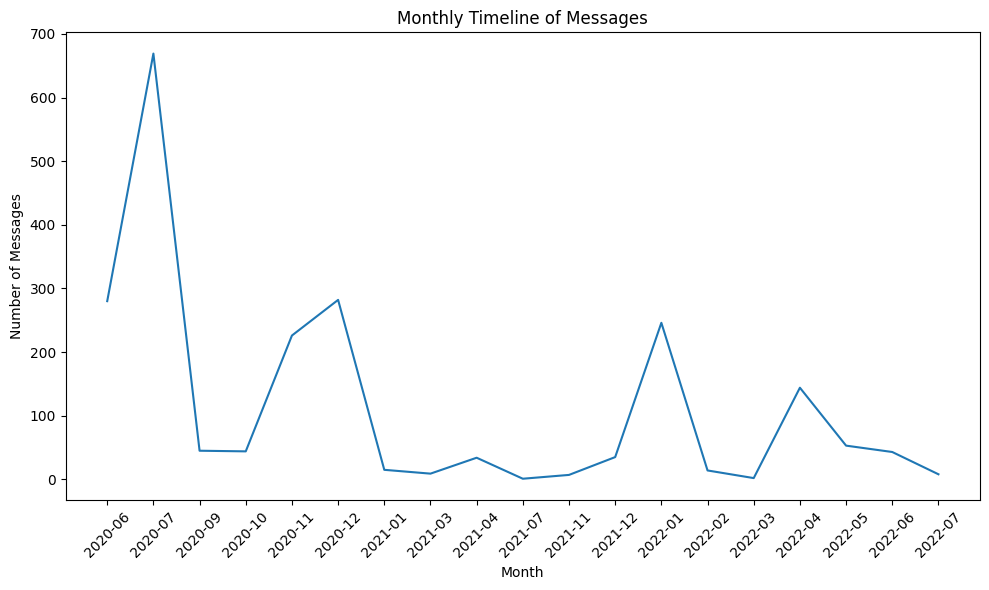

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('output.csv')

# Convert the 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract the month and year from each date
df['YearMonth'] = df['DateTime'].dt.to_period('M')

# Count the number of messages each month
message_counts = df['YearMonth'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(10,6))
plt.plot(message_counts.index.astype(str), message_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.title('Monthly Timeline of Messages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


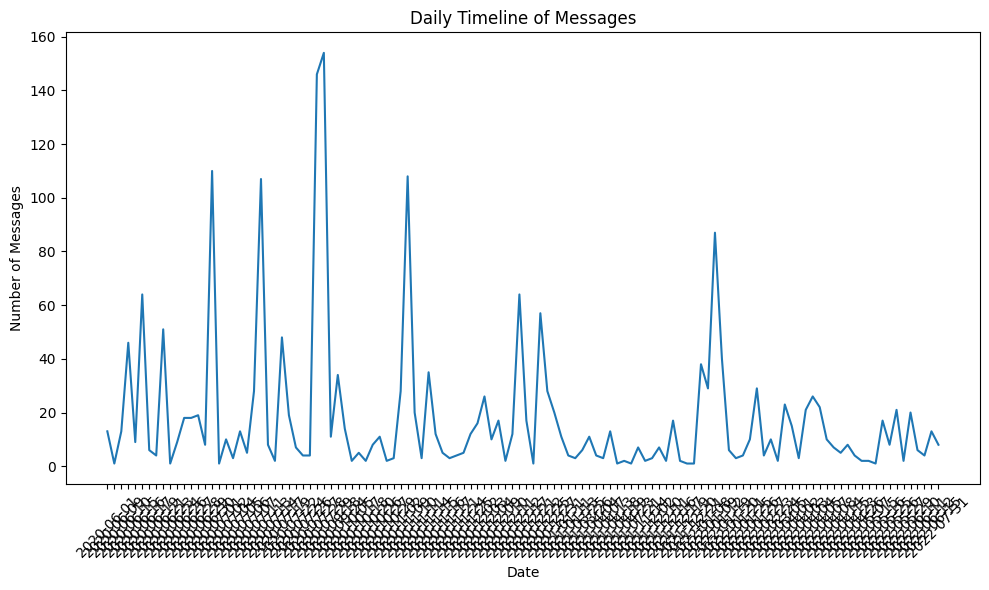

In [39]:
# Extract the date from each datetime
df['Date'] = df['DateTime'].dt.to_period('D')

# Count the number of messages each day
message_counts = df['Date'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(10,6))
plt.plot(message_counts.index.astype(str), message_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.title('Daily Timeline of Messages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


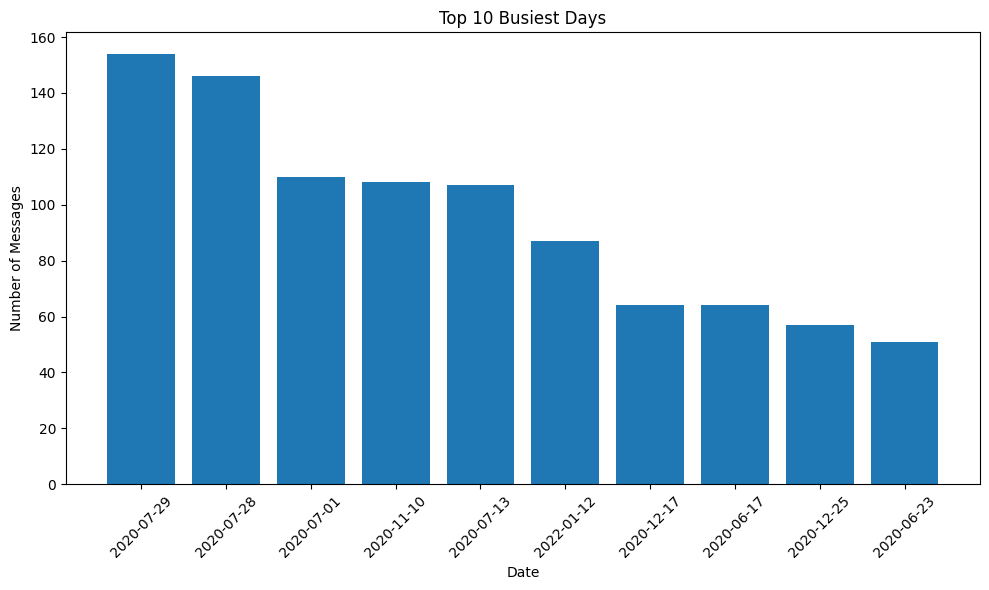

In [40]:
# Count the number of messages each day
message_counts = df['Date'].value_counts()

# Get the top 10 busiest days
top_days = message_counts.nlargest(10)

# Create the bar chart
plt.figure(figsize=(10,6))
plt.bar(top_days.index.astype(str), top_days.values)
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.title('Top 10 Busiest Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


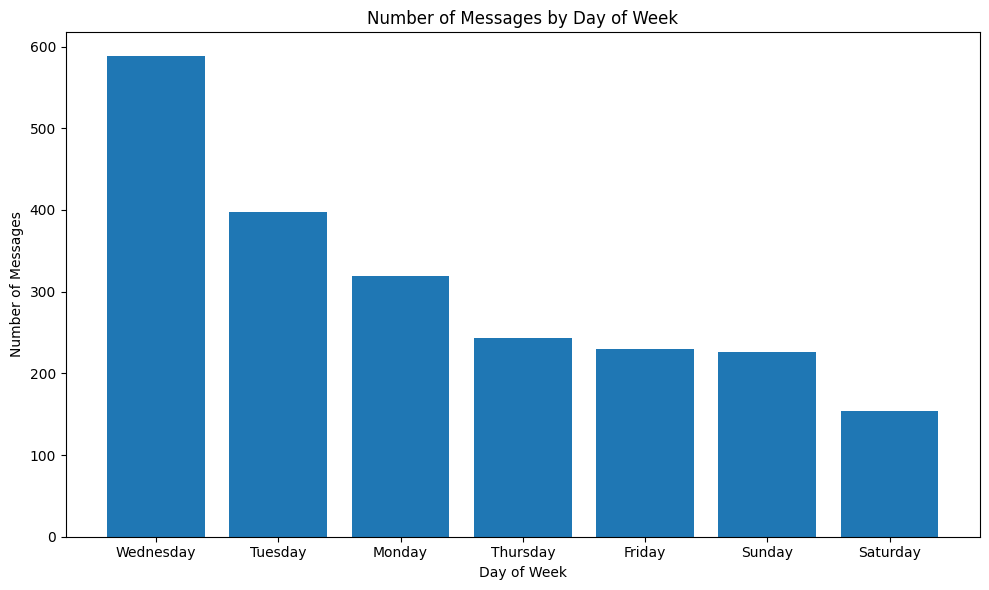

In [41]:
# Extract the day of the week from each date (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['DateTime'].dt.dayofweek

# Map the day of the week numbers to names
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['DayOfWeek'] = df['DayOfWeek'].map(days)

# Count the number of messages each day of the week
message_counts = df['DayOfWeek'].value_counts()

# Create the bar chart
plt.figure(figsize=(10,6))
plt.bar(message_counts.index, message_counts.values)
plt.xlabel('Day of Week')
plt.ylabel('Number of Messages')
plt.title('Number of Messages by Day of Week')
plt.tight_layout()
plt.show()


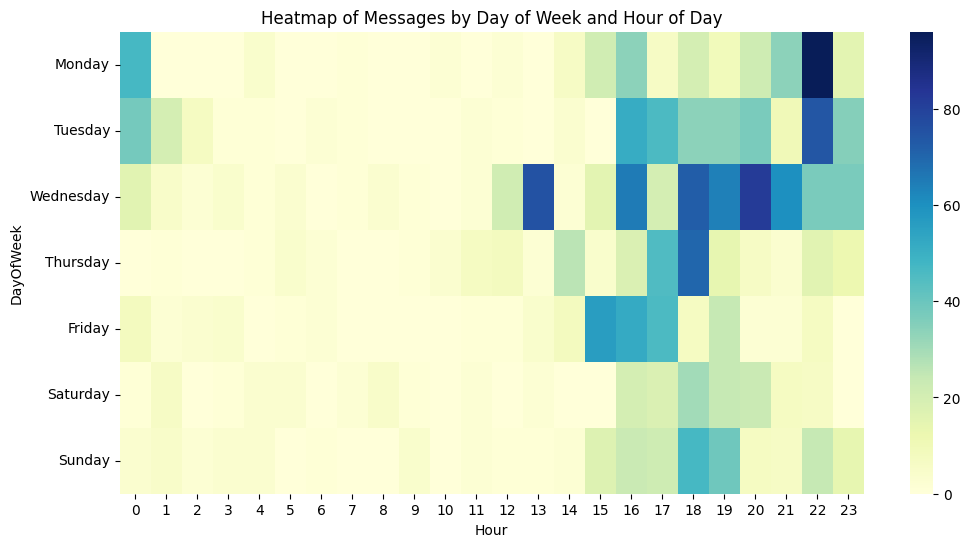

In [42]:
import seaborn as sns

# Extract the hour from each datetime
df['Hour'] = df['DateTime'].dt.hour

# Create a pivot table with the count of messages for each day of the week and hour of the day
pivot_table = df.pivot_table(values='Message', index='DayOfWeek', columns='Hour', aggfunc='count', fill_value=0)

# Order the index (day of the week) according to the actual order of days in a week
days_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(days_ordered)

# Create the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heatmap of Messages by Day of Week and Hour of Day')
plt.show()


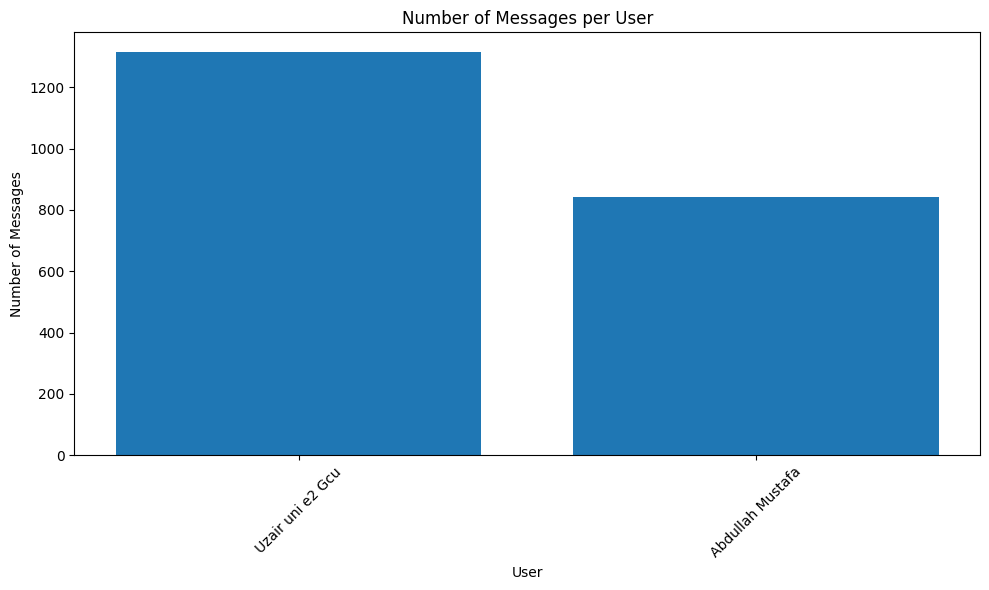

In [43]:
# Count the number of messages per user
message_counts = df['User'].value_counts()

# Create the bar chart
plt.figure(figsize=(10,6))
plt.bar(message_counts.index, message_counts.values)
plt.xlabel('User')
plt.ylabel('Number of Messages')
plt.title('Number of Messages per User')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
